# Part I - Data Exploratory of prosperLoanData
## by Andrew Muhoro

## Project Overview

This project has two parts that demonstrate the importance and value of data visualization techniques in the data analysis process.

1. Part I : Exploratory Data Visualization

This part will require using Python visualization libraries to systematically explore a selected dataset, starting from plots of single variables and building up to plots of multiple variables.

2. Part II : Explanatory Data Visualization

In this section, will require producing a short presentation that illustrates interesting properties, trends, and relationships that discovered in **Loan Data from Prosper** dataset. The primary method of conveying findings will be through transforming exploratory visualizations from the first part into polished, explanatory visualizations.

### What to install to get this running

This project uses Python 3 and is designed to be completed through the Jupyter Notebooks IDE. It is highly recommended that you use the Anaconda distribution to install Python, since the distribution includes all necessary Python libraries as well as Jupyter Notebooks. The following libraries are expected to be used in this project:

- NumPy
- Pandas
- Matplotlib
- Seaborn


### Dataset : Loan Data from Prosper

This data set contains 113,937 loans with 81 variables on each loan, including loan amount, borrower rate (or interest rate), current loan status, borrower income, and many others. See this data dictionary to understand the dataset's variables.


### Goal in this Phase
Of interest in this phase is to have a look at the basic structure of the loans given. This means having a look at the amounts given, interests and fees, time and the state of the borrowers, etc.

This will mean having a look at features like: CreditGrade, Term, LoanStatus, BorrowerState, EmploymentStatus, LP_InterestandFees,LoanOriginalAmount,LoanOriginationDate, amongst others.

## 1. Data Gathering

In [82]:
# Import needed Python Libraries

import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

%matplotlib inline

In [83]:
#import warnings
import warnings
warnings.filterwarnings('ignore')

> Load the dataset

In [84]:
# Load the dataset and display first 5 rows
df_loans = pd.read_csv("prosperLoanData.csv")

df_loans.head()

,ListingKey,ListingNumber,ListingCreationDate,CreditGrade,Term,LoanStatus,ClosedDate,BorrowerAPR,BorrowerRate,LenderYield,...,LP_ServiceFees,LP_CollectionFees,LP_GrossPrincipalLoss,LP_NetPrincipalLoss,LP_NonPrincipalRecoverypayments,PercentFunded,Recommendations,InvestmentFromFriendsCount,InvestmentFromFriendsAmount,Investors
0,1021339766868145413AB3B,193129,2007-08-26 19:09:29.263000000,C,36,Completed,2009-08-14 00:00:00,0.16516,0.1580,0.1380,...,-133.18,0.0,0.0,0.0,0.0,1.0,0,0,0.0,258
1,10273602499503308B223C1,1209647,2014-02-27 08:28:07.900000000,NaN,36,Current,NaN,0.12016,0.0920,0.0820,...,0.00,0.0,0.0,0.0,0.0,1.0,0,0,0.0,1
2,0EE9337825851032864889A,81716,2007-01-05 15:00:47.090000000,HR,36,Completed,2009-12-17 00:00:00,0.28269,0.2750,0.2400,...,-24.20,0.0,0.0,0.0,0.0,1.0,0,0,0.0,41
3,0EF5356002482715299901A,658116,2012-10-22 11:02:35.010000000,NaN,36,Current,NaN,0.12528,0.0974,0.0874,...,-108.01,0.0,0.0,0.0,0.0,1.0,0,0,0.0,158
4,0F023589499656230C5E3E2,909464,2013-09-14 18:38:39.097000000,NaN,36,Current,NaN,0.24614,0.2085,0.1985,...,-60.27,0.0,0.0,0.0,0.0,1.0,0,0,0.0,20


> The structure of the dataset

In [85]:
# Get more information the dataset structure
df_loans.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 113937 entries, 0 to 113936
Data columns (total 81 columns):
 #   Column                               Non-Null Count   Dtype  
---  ------                               --------------   -----  
 0   ListingKey                           113937 non-null  object 
 1   ListingNumber                        113937 non-null  int64  
 2   ListingCreationDate                  113937 non-null  object 
 3   CreditGrade                          28953 non-null   object 
 4   Term                                 113937 non-null  int64  
 5   LoanStatus                           113937 non-null  object 
 6   ClosedDate                           55089 non-null   object 
 7   BorrowerAPR                          113912 non-null  float64
 8   BorrowerRate                         113937 non-null  float64
 9   LenderYield                          113937 non-null  float64
 10  EstimatedEffectiveYield              84853 non-null   float64
 11  EstimatedLoss

In [86]:
# Check how many columns and rows the dataset contains
df_loans.shape

(113937, 81)

In [87]:
# Check count of missing values by column
missing_values = df_loans.isna().sum()
missing_values[:10]

ListingKey                 0
ListingNumber              0
ListingCreationDate        0
CreditGrade            84984
Term                       0
LoanStatus                 0
ClosedDate             58848
BorrowerAPR               25
BorrowerRate               0
LenderYield                0
dtype: int64

In [88]:
# Check the headers
for col in df_loans:
    print(col)

ListingKey
ListingNumber
ListingCreationDate
CreditGrade
Term
LoanStatus
ClosedDate
BorrowerAPR
BorrowerRate
LenderYield
EstimatedEffectiveYield
EstimatedLoss
EstimatedReturn
ProsperRating (numeric)
ProsperRating (Alpha)
ProsperScore
ListingCategory (numeric)
BorrowerState
Occupation
EmploymentStatus
EmploymentStatusDuration
IsBorrowerHomeowner
CurrentlyInGroup
GroupKey
DateCreditPulled
CreditScoreRangeLower
CreditScoreRangeUpper
FirstRecordedCreditLine
CurrentCreditLines
OpenCreditLines
TotalCreditLinespast7years
OpenRevolvingAccounts
OpenRevolvingMonthlyPayment
InquiriesLast6Months
TotalInquiries
CurrentDelinquencies
AmountDelinquent
DelinquenciesLast7Years
PublicRecordsLast10Years
PublicRecordsLast12Months
RevolvingCreditBalance
BankcardUtilization
AvailableBankcardCredit
TotalTrades
TradesNeverDelinquent (percentage)
TradesOpenedLast6Months
DebtToIncomeRatio
IncomeRange
IncomeVerifiable
StatedMonthlyIncome
LoanKey
TotalProsperLoans
TotalProsperPaymentsBilled
OnTimeProsperPayments
P

In [89]:
# Check duplicates 
df_loans.duplicated().sum()

0

In [90]:
# Create a  copy of original the dataset
df_loanscp = df_loans.copy()
df_loanscp.head()

,ListingKey,ListingNumber,ListingCreationDate,CreditGrade,Term,LoanStatus,ClosedDate,BorrowerAPR,BorrowerRate,LenderYield,...,LP_ServiceFees,LP_CollectionFees,LP_GrossPrincipalLoss,LP_NetPrincipalLoss,LP_NonPrincipalRecoverypayments,PercentFunded,Recommendations,InvestmentFromFriendsCount,InvestmentFromFriendsAmount,Investors
0,1021339766868145413AB3B,193129,2007-08-26 19:09:29.263000000,C,36,Completed,2009-08-14 00:00:00,0.16516,0.1580,0.1380,...,-133.18,0.0,0.0,0.0,0.0,1.0,0,0,0.0,258
1,10273602499503308B223C1,1209647,2014-02-27 08:28:07.900000000,NaN,36,Current,NaN,0.12016,0.0920,0.0820,...,0.00,0.0,0.0,0.0,0.0,1.0,0,0,0.0,1
2,0EE9337825851032864889A,81716,2007-01-05 15:00:47.090000000,HR,36,Completed,2009-12-17 00:00:00,0.28269,0.2750,0.2400,...,-24.20,0.0,0.0,0.0,0.0,1.0,0,0,0.0,41
3,0EF5356002482715299901A,658116,2012-10-22 11:02:35.010000000,NaN,36,Current,NaN,0.12528,0.0974,0.0874,...,-108.01,0.0,0.0,0.0,0.0,1.0,0,0,0.0,158
4,0F023589499656230C5E3E2,909464,2013-09-14 18:38:39.097000000,NaN,36,Current,NaN,0.24614,0.2085,0.1985,...,-60.27,0.0,0.0,0.0,0.0,1.0,0,0,0.0,20


In [91]:
# Check the count of LoanOriginalAmount
df_loanscp.LoanOriginalAmount.value_counts()

4000     14333
15000    12407
10000    11106
5000      6990
2000      6067
         ...  
7765         1
5652         1
9746         1
15889        1
12282        1
Name: LoanOriginalAmount, Length: 2468, dtype: int64

In [92]:
# Statistical view of LoanOriginalAmount
df_loanscp.LoanOriginalAmount.describe()

count    113937.00000
mean       8337.01385
std        6245.80058
min        1000.00000
25%        4000.00000
50%        6500.00000
75%       12000.00000
max       35000.00000
Name: LoanOriginalAmount, dtype: float64

In [93]:
# Statistical view of LP_InterestandFees
df_loanscp.LP_InterestandFees.describe()

count    113937.000000
mean       1077.542901
std        1183.414168
min          -2.349900
25%         274.870000
50%         700.840100
75%        1458.540000
max       15617.030000
Name: LP_InterestandFees, dtype: float64

In [94]:
# Check count of Terms
df_loanscp.Term.value_counts()

36    87778
60    24545
12     1614
Name: Term, dtype: int64

In [95]:
# Checking the custom risk score on loans taken
# The score ranges from 1-10, with 10 being the best, or lowest risk score. 
df_loanscp.ProsperScore.value_counts()

4.0     12595
6.0     12278
8.0     12053
7.0     10597
5.0      9813
3.0      7642
9.0      6911
2.0      5766
10.0     4750
11.0     1456
1.0       992
Name: ProsperScore, dtype: int64

In [96]:
# Breakdown of loan categories
df_loanscp.Occupation.value_counts()

Other                          28617
Professional                   13628
Computer Programmer             4478
Executive                       4311
Teacher                         3759
                               ...  
Dentist                           68
Student - College Freshman        41
Student - Community College       28
Judge                             22
Student - Technical School        16
Name: Occupation, Length: 67, dtype: int64

## Data Cleaning

> Convert Date Columns to Datetime Datatype

In [97]:
# Convert mutiple columns using the dot apply method
df_loans[['ClosedDate','DateCreditPulled','DateCreditPulled','LoanOriginationDate' ]] = df_loans[['ClosedDate','DateCreditPulled','DateCreditPulled','LoanOriginationDate' ]].apply(pd.to_datetime)

> **To save on loading time for the copied dataset, I will be dropping columns that I will not need in this phase**

In [98]:
# First create a list of all columns
all_cols = []
for col in df_loanscp:
        all_cols.append(col)
print(all_cols)

['ListingKey', 'ListingNumber', 'ListingCreationDate', 'CreditGrade', 'Term', 'LoanStatus', 'ClosedDate', 'BorrowerAPR', 'BorrowerRate', 'LenderYield', 'EstimatedEffectiveYield', 'EstimatedLoss', 'EstimatedReturn', 'ProsperRating (numeric)', 'ProsperRating (Alpha)', 'ProsperScore', 'ListingCategory (numeric)', 'BorrowerState', 'Occupation', 'EmploymentStatus', 'EmploymentStatusDuration', 'IsBorrowerHomeowner', 'CurrentlyInGroup', 'GroupKey', 'DateCreditPulled', 'CreditScoreRangeLower', 'CreditScoreRangeUpper', 'FirstRecordedCreditLine', 'CurrentCreditLines', 'OpenCreditLines', 'TotalCreditLinespast7years', 'OpenRevolvingAccounts', 'OpenRevolvingMonthlyPayment', 'InquiriesLast6Months', 'TotalInquiries', 'CurrentDelinquencies', 'AmountDelinquent', 'DelinquenciesLast7Years', 'PublicRecordsLast10Years', 'PublicRecordsLast12Months', 'RevolvingCreditBalance', 'BankcardUtilization', 'AvailableBankcardCredit', 'TotalTrades', 'TradesNeverDelinquent (percentage)', 'TradesOpenedLast6Months', 'Deb

In [99]:
# Dropping column
df_loanscp.drop(['ListingCreationDate','ProsperRating (Alpha)','LenderYield','ListingCategory (numeric)','CurrentlyInGroup','DateCreditPulled','CreditScoreRangeLower','CreditScoreRangeUpper','FirstRecordedCreditLine','CurrentCreditLines','GroupKey','ProsperPrincipalBorrowed','ProsperPrincipalOutstanding','EstimatedEffectiveYield','EstimatedLoss','EstimatedReturn','ProsperRating (numeric)',
        'TotalProsperLoans','TotalProsperPaymentsBilled','OnTimeProsperPayments','ProsperPaymentsLessThanOneMonthLate','ProsperPaymentsOneMonthPlusLate','ListingKey'], axis =1, inplace = True)
df_loanscp.head()

,ListingNumber,CreditGrade,Term,LoanStatus,ClosedDate,BorrowerAPR,BorrowerRate,ProsperScore,BorrowerState,Occupation,...,LP_ServiceFees,LP_CollectionFees,LP_GrossPrincipalLoss,LP_NetPrincipalLoss,LP_NonPrincipalRecoverypayments,PercentFunded,Recommendations,InvestmentFromFriendsCount,InvestmentFromFriendsAmount,Investors
0,193129,C,36,Completed,2009-08-14 00:00:00,0.16516,0.1580,NaN,CO,Other,...,-133.18,0.0,0.0,0.0,0.0,1.0,0,0,0.0,258
1,1209647,NaN,36,Current,NaN,0.12016,0.0920,7.0,CO,Professional,...,0.00,0.0,0.0,0.0,0.0,1.0,0,0,0.0,1
2,81716,HR,36,Completed,2009-12-17 00:00:00,0.28269,0.2750,NaN,GA,Other,...,-24.20,0.0,0.0,0.0,0.0,1.0,0,0,0.0,41
3,658116,NaN,36,Current,NaN,0.12528,0.0974,9.0,GA,Skilled Labor,...,-108.01,0.0,0.0,0.0,0.0,1.0,0,0,0.0,158
4,909464,NaN,36,Current,NaN,0.24614,0.2085,4.0,MN,Executive,...,-60.27,0.0,0.0,0.0,0.0,1.0,0,0,0.0,20


> **Feature Engineering based on existing data.**

In [100]:
# Create a year column based on the LoanOriginationDate
df_loanscp['LoanOriginationYear'] = pd.DatetimeIndex(df_loanscp['LoanOriginationDate']).year
df_loanscp['LoanOriginationYear']

0         2007
1         2014
2         2007
3         2012
4         2013
          ... 
113932    2013
113933    2011
113934    2013
113935    2011
113936    2014
Name: LoanOriginationYear, Length: 113937, dtype: int64

In [101]:
# Filling the NaN values in the CreditGrade Column with "No Grade"

df_loanscp['CreditGrade'] = df_loanscp['CreditGrade'].fillna('No Grade')


In [102]:
# Checking missing values in the CreditGrade column
missing_credits = df_loanscp.CreditGrade.isna().sum()
missing_credits

0

## Univariate Exploration

> **In this section, we will investigate the distributions of individual variables.**

> **We will use the "Question-Visualization-Observations" framework  throughout the exploration. This framework involves asking a question from the data, creating a visualization to find answers, and then recording observations after each visualisation.** 


### What is the range distribution like for the OriginalLoanAmount for loans taken ? 

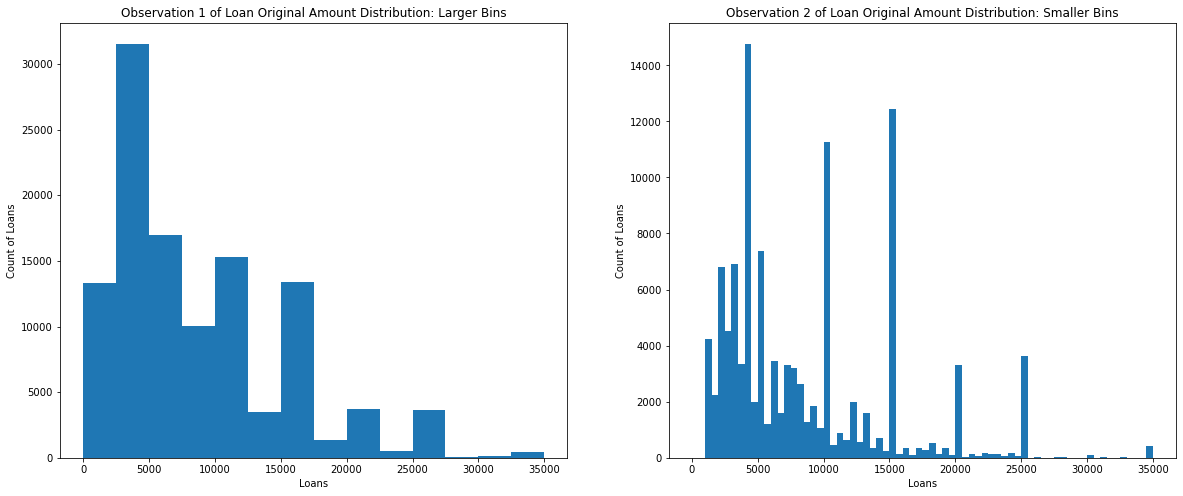

In [103]:
# Resize the chart, and have two plots side-by-side
# Set a larger figure size for subplots
plt.figure(figsize = [20, 8])

# histogram on left, example of too-large bin size
plt.subplot(1, 2, 1)
bin_edges = np.arange(0, df_loanscp['LoanOriginalAmount'].max()+2500,2500)
plt.hist(data = df_loanscp, x = 'LoanOriginalAmount', bins = bin_edges)
plt.title("Observation 1 of Loan Original Amount Distribution: Larger Bins")
plt.ylabel("Count of Loans")
plt.xlabel("Loans");


# histogram on right, example of too-small bin size
plt.subplot(1, 2, 2)
bin_edges = np.arange(0, df_loanscp['LoanOriginalAmount'].max()+2500/5,2500/5)
plt.hist(data = df_loanscp, x = 'LoanOriginalAmount', bins = bin_edges)
plt.title("Observation 2 of Loan Original Amount Distribution: Smaller Bins")
plt.ylabel("Count of Loans")
plt.xlabel("Loans");

> **Majority of the original loan amounts are below $20,000.**

### What is the range distribution like for the Loan interests and fees for loans taken ? 

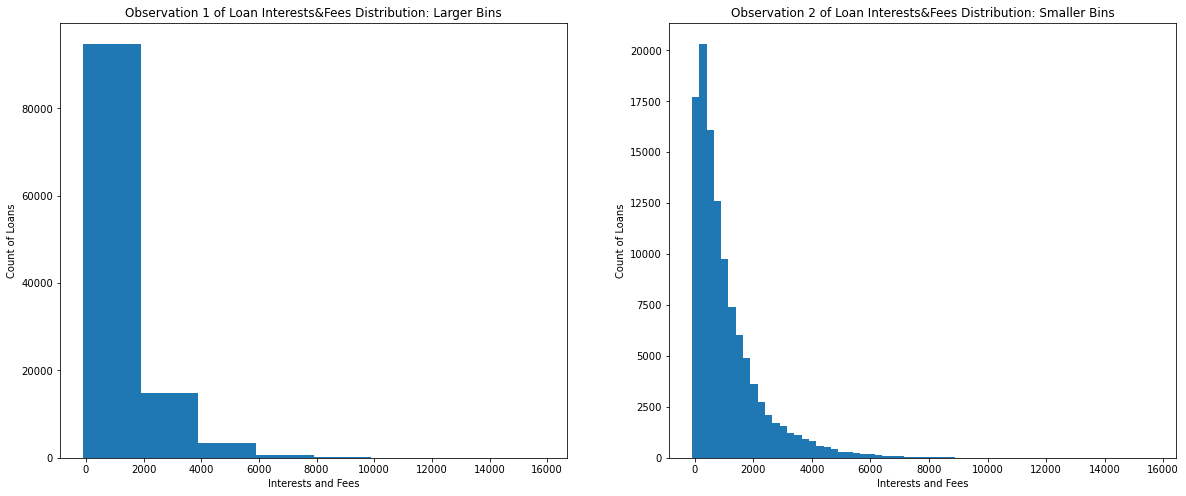

In [104]:
# Resize the chart, and have two plots side-by-side
# Set a larger figure size for subplots
plt.figure(figsize = [20, 8])

# histogram on left, example of too-large bin size
plt.subplot(1, 2, 1)
bin_edges = np.arange(-100, df_loanscp['LP_InterestandFees'].max()+2000,2000)
plt.hist(data = df_loanscp, x = 'LP_InterestandFees', bins = bin_edges)
plt.title("Observation 1 of Loan Interests&Fees Distribution: Larger Bins")
plt.ylabel("Count of Loans")
plt.xlabel("Interests and Fees");

# histogram on right, example of too-small bin size
plt.subplot(1, 2, 2)
bin_edges = np.arange(-100, df_loanscp['LP_InterestandFees'].max()+2000/8,2000/8)
plt.hist(data = df_loanscp, x = 'LP_InterestandFees', bins = bin_edges)
plt.title("Observation 2 of Loan Interests&Fees Distribution: Smaller Bins")
plt.ylabel("Count of Loans")
plt.xlabel("Interests and Fees");

> **Majority of interests and fees charged for loans taken are below $4,000.**

### Which year had the most and least count of loans given?

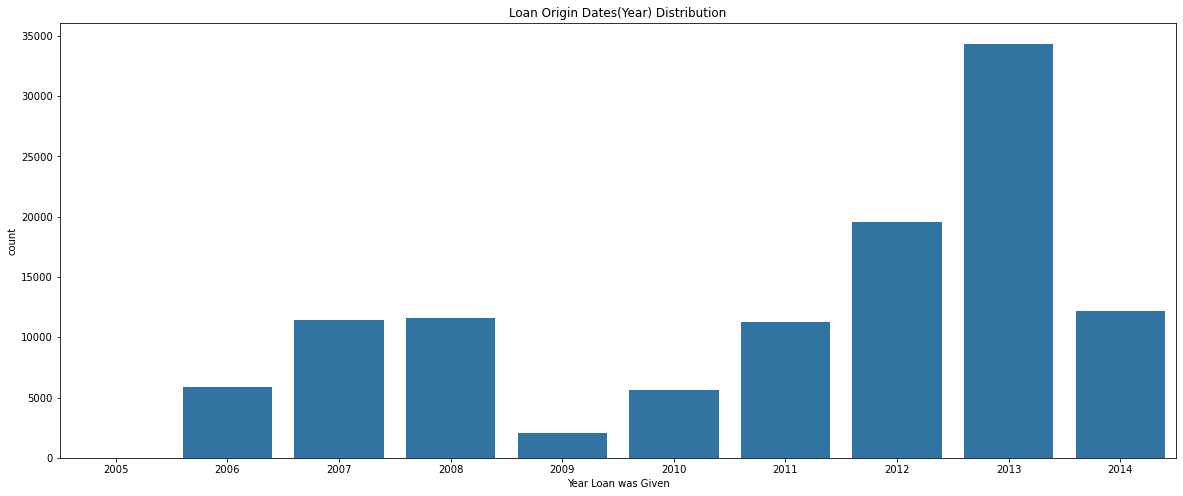

In [105]:
plt.figure(figsize = [20, 8])
bcolor = sns.color_palette()[0]
sns.countplot(data=df_loanscp, x=df_loanscp['LoanOriginationYear'],color=bcolor)
plt.title('Loan Origin Dates(Year) Distribution')
plt.xlabel('Year Loan was Given');

> **2013 had the highest number of loans given while 2005 had the least.**

### What is the distribution like for loan terms for loans given?

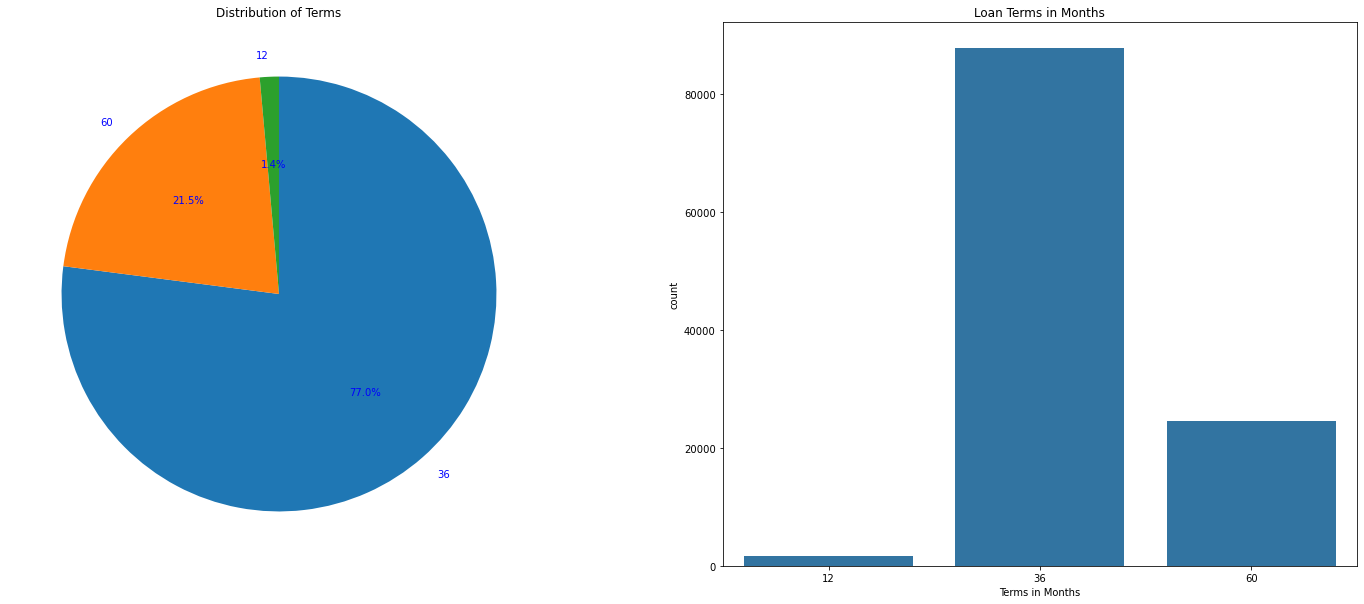

In [106]:
# Aggregate the term lengths
term_counts = df_loanscp['Term'].value_counts()


plt.figure(figsize = [25, 10])


# Construct the pie
plt.subplot(1, 2, 1)
plt.pie(term_counts, labels = term_counts.index, startangle = 90, counterclock = False, autopct='%1.1f%%', textprops={'color':"b"})
plt.title("Distribution of Terms");

# Loan by term
plt.subplot(1, 2, 2)
bcolor = sns.color_palette()[0]
sns.countplot(data=df_loanscp,x= 'Term',color=bcolor)
plt.title('Loan Terms in Months')
plt.xlabel('Terms in Months');

> **Majority of the loans given had  36-month terms and the 12-month terms had the least number of loans of the loans given.**

### What was the employment status for the borrowers?

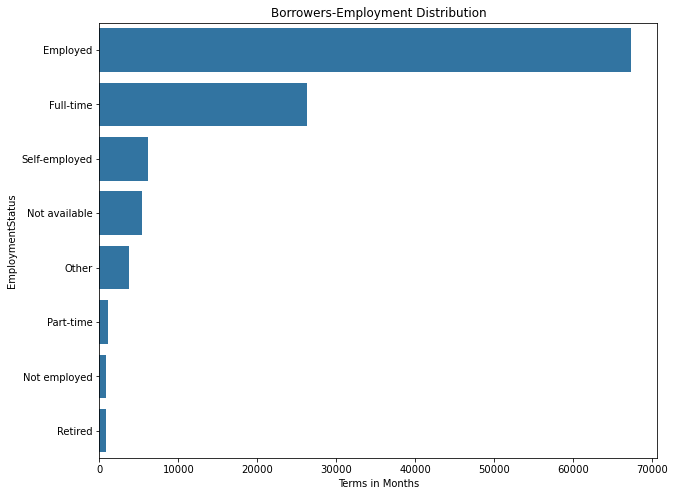

In [107]:
bcolor = sns.color_palette()[0]
cate_order = df_loanscp.EmploymentStatus.value_counts().index
plt.figure(figsize=[10, 8])
sns.countplot(data=df_loanscp,y='EmploymentStatus',color=bcolor, order=cate_order)
plt.title('Borrowers-Employment Distribution')
plt.xlabel('Terms in Months');

> **Majority of the borrowers were employed while the retirers took the least number of loans.**

### What is the status for all the loans given?

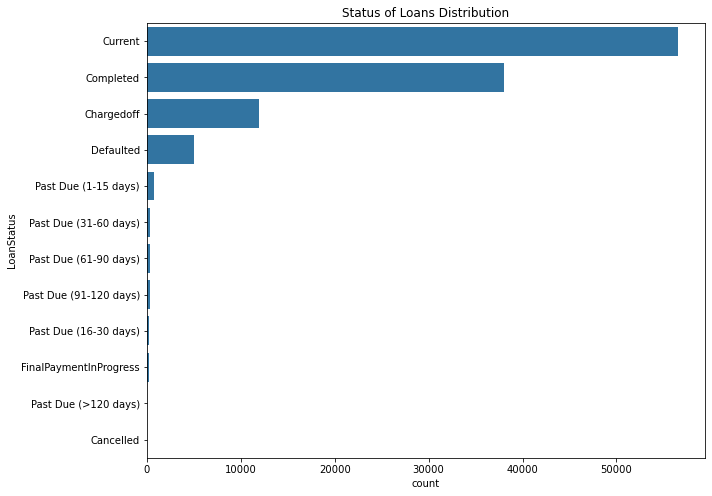

In [108]:
bcolor = sns.color_palette()[0]
cate_order = df_loanscp.LoanStatus.value_counts().index
plt.figure(figsize=[10, 8])
sns.countplot(data=df_loanscp,y='LoanStatus',color=bcolor, order=cate_order)
plt.title('Status of Loans Distribution');

> **Majority of the loans are current.**

### What is the breakdown of the Income Range for the Borrowers?

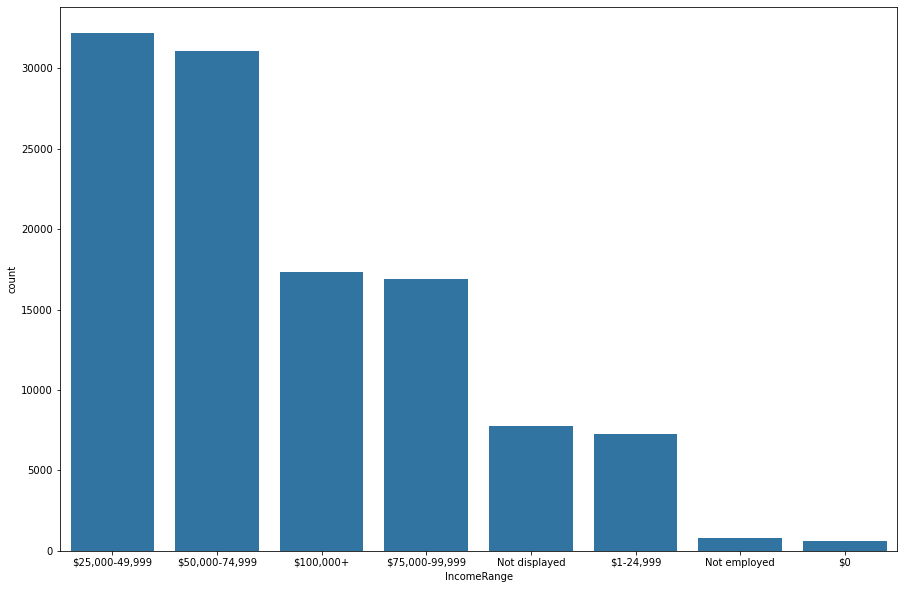

In [109]:
plt.figure(figsize = (15,10))
bcolor = sns.color_palette()[0]
sns.countplot(df_loanscp.IncomeRange.dropna(), order = df_loanscp.IncomeRange.value_counts().index, color=bcolor);

> **Borrowers with an income range of between $25,000 to $49,999 were the majority followed closely by those in the bracket of $50,000 to $74,999. Those categorized in the $0 were the least, no surprises there.** 

### What was the ratio of incomes verified to get a loan?

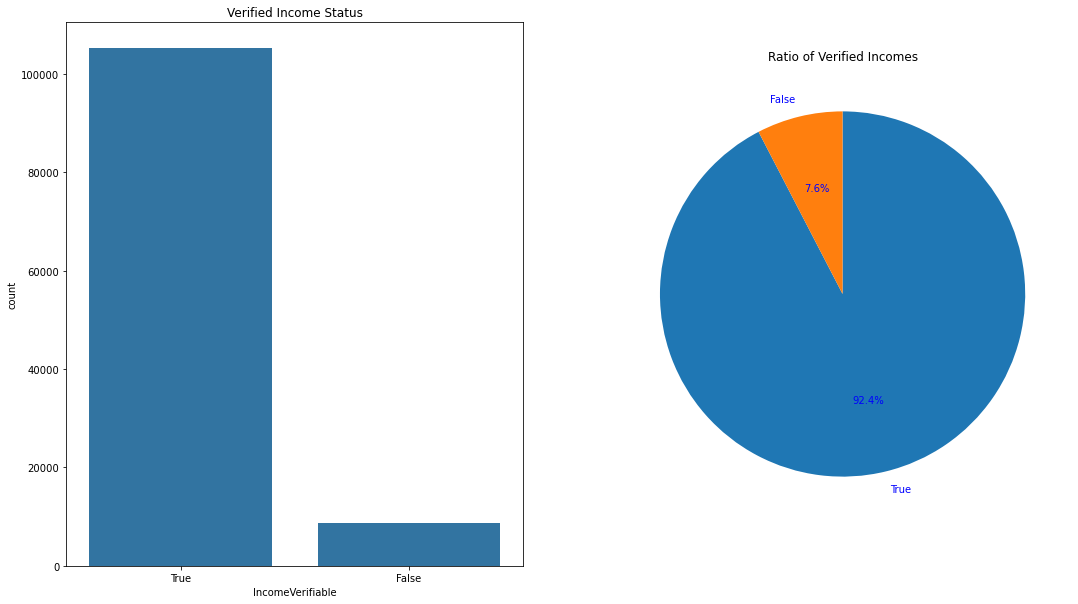

In [110]:
# Check the count of verified incomes
vincome_counts = df_loanscp.IncomeVerifiable.value_counts()

plt.figure(figsize = (18,10))

plt.subplot(1,2,1)
bcolor = sns.color_palette()[0]
sns.countplot(df_loanscp.IncomeVerifiable.dropna(), order = df_loanscp.IncomeVerifiable.value_counts().index, color=bcolor)
plt.title("Verified Income Status");

plt.subplot(1, 2, 2)
plt.pie(vincome_counts, labels = vincome_counts.index, startangle = 90, counterclock = False, autopct='%1.1f%%', textprops={'color':"b"})
plt.title("Ratio of Verified Incomes");

> **Majority of the incomes were verified.**

### What is the highest number of BorrowerRate?

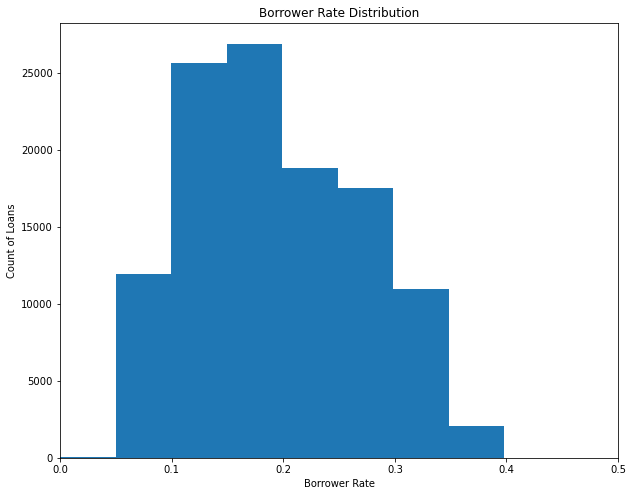

In [111]:
plt.figure(figsize=[10, 8])
plt.hist(df_loanscp['BorrowerRate'])
plt.xlim((0,0.5))
plt.title('Borrower Rate Distribution')
plt.xlabel('Borrower Rate')
plt.ylabel('Count of Loans');

> **The highest number of Borrower Rate is between 0.1 and 0.2**

### What is the Monthly Loan Payment Distribution like?

In [112]:
df_loanscp.MonthlyLoanPayment.describe()

count    113937.000000
mean        272.475783
std         192.697812
min           0.000000
25%         131.620000
50%         217.740000
75%         371.580000
max        2251.510000
Name: MonthlyLoanPayment, dtype: float64

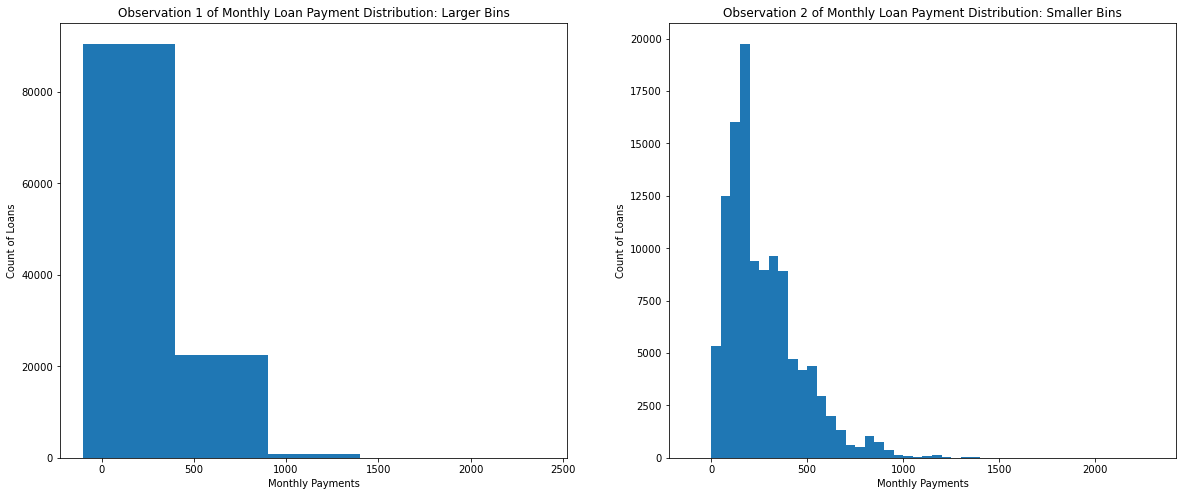

In [113]:
# Resize the chart, and have two plots side-by-side
# Set a larger figure size for subplots
plt.figure(figsize = [20, 8])

# histogram on left, example of too-large bin size
plt.subplot(1, 2, 1)
bin_edges = np.arange(-100, df_loanscp['MonthlyLoanPayment'].max()+500,500)
plt.hist(data = df_loanscp, x = 'MonthlyLoanPayment', bins = bin_edges)
plt.title("Observation 1 of Monthly Loan Payment Distribution: Larger Bins")
plt.ylabel("Count of Loans")
plt.xlabel("Monthly Payments");

# histogram on right, example of too-small bin size
plt.subplot(1, 2, 2)
bin_edges = np.arange(-100, df_loanscp['MonthlyLoanPayment'].max()+500/10,500/10)
plt.hist(data = df_loanscp, x = 'MonthlyLoanPayment', bins = bin_edges)
plt.title("Observation 2 of Monthly Loan Payment Distribution: Smaller Bins")
plt.ylabel("Count of Loans")
plt.xlabel("Monthly Payments");

### Is the borrower a Homeowner?

In [114]:
homeowner_count = df_loanscp.IsBorrowerHomeowner.value_counts()
homeowner_count

True     57478
False    56459
Name: IsBorrowerHomeowner, dtype: int64

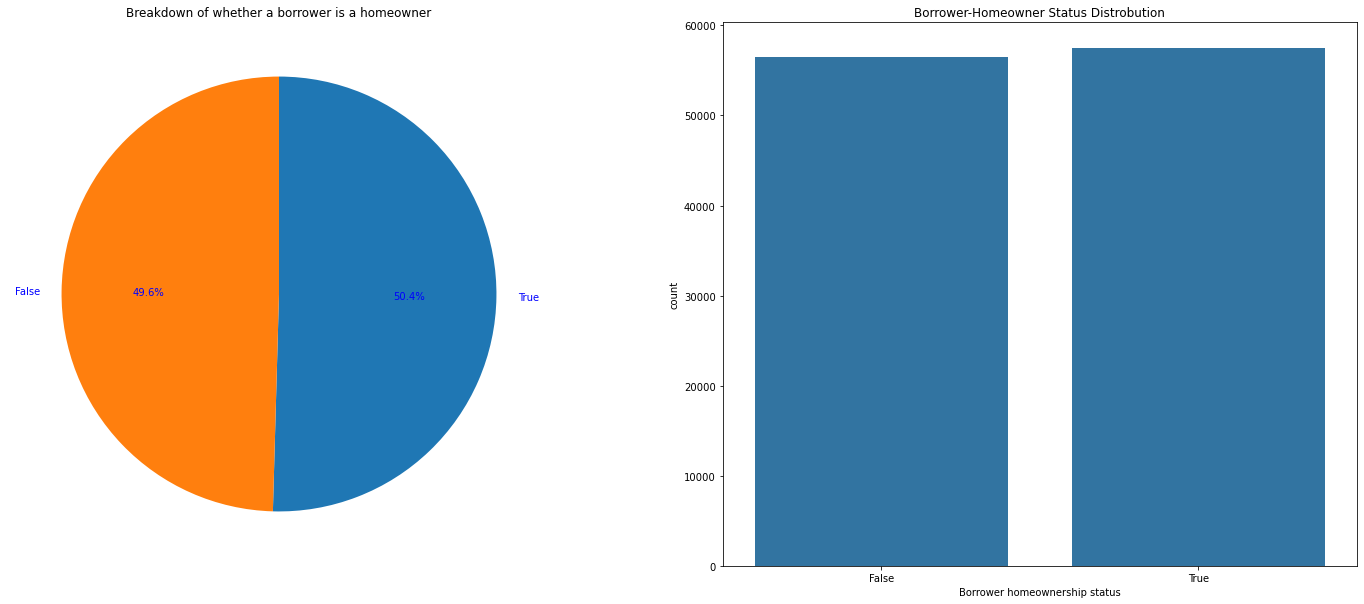

In [115]:
homeowner_count = df_loanscp.IsBorrowerHomeowner.value_counts()

plt.figure(figsize=[25,10])

plt.subplot(1, 2, 1)
plt.pie(homeowner_count, labels = homeowner_count.index, startangle = 90, counterclock = False, autopct='%1.1f%%', textprops={'color':"b"})
plt.title("Breakdown of whether a borrower is a homeowner");

plt.subplot(1, 2, 2)
base_color = sns.color_palette()[0]
sns.countplot(data=df_loanscp,x= 'IsBorrowerHomeowner',color=base_color);
plt.title('Borrower-Homeowner Status Distrobution')
plt.xlabel('Borrower homeownership status');

> **Majority of the borrowers own a home. The difference between the two is neglible by less than 1% though.**

### What is the breakdown of the borrowers' occupations like?

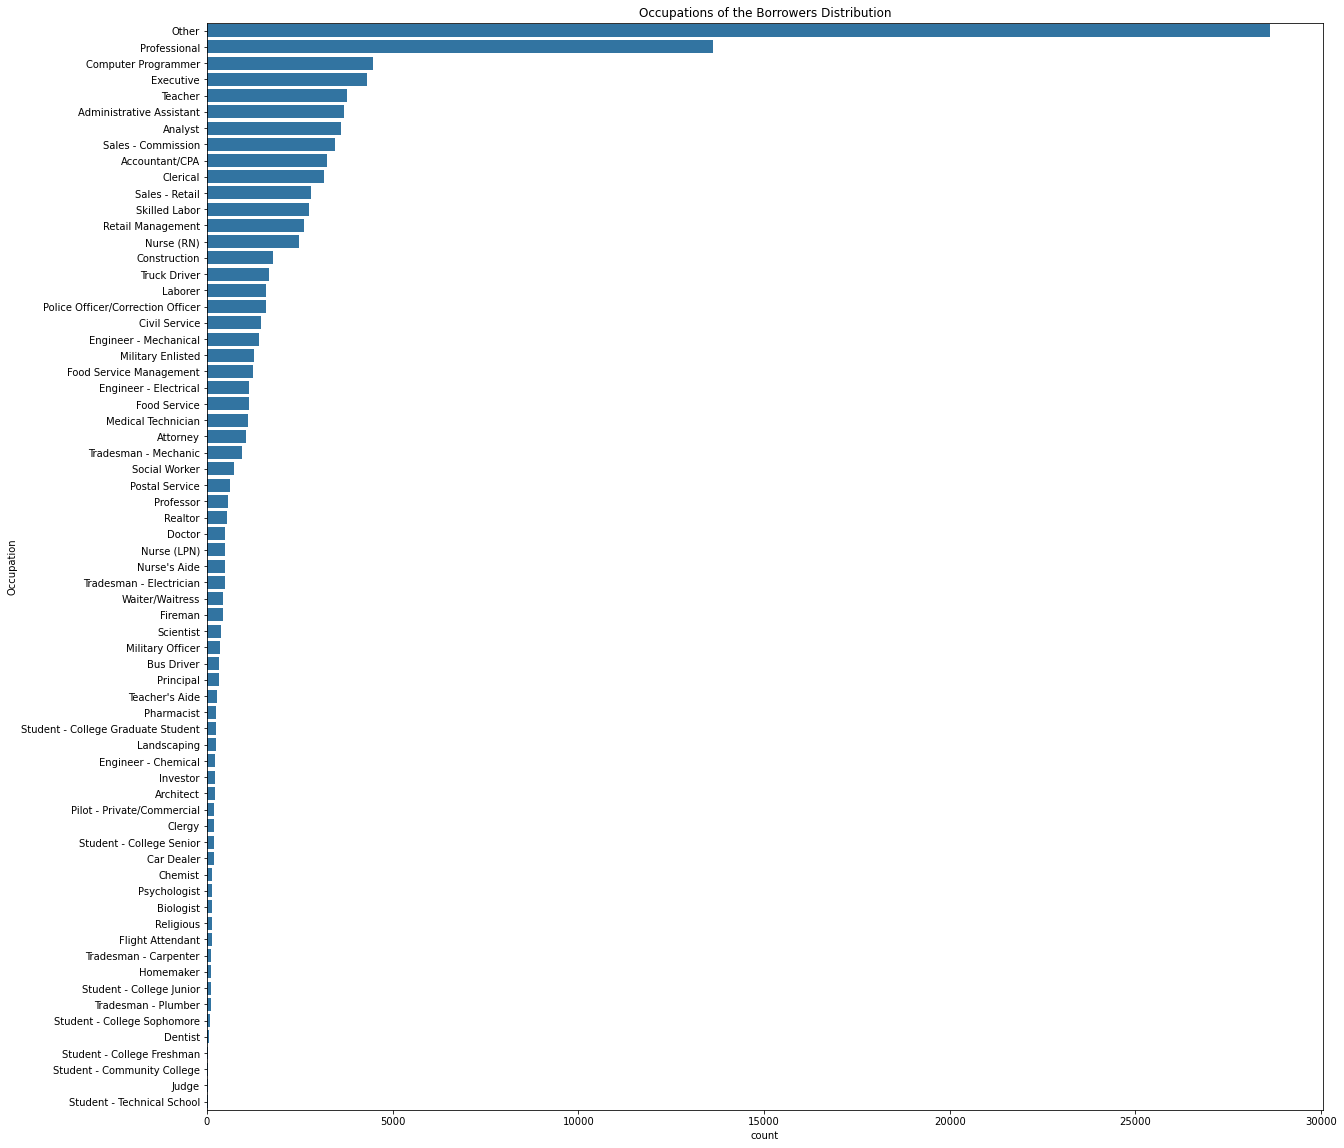

In [116]:
plt.figure(figsize=[20,20])
bcolor = sns.color_palette()[0]

cate_order = df_loanscp.Occupation.value_counts().index
sns.countplot(data=df_loanscp,y= 'Occupation',color=bcolor, order=cate_order)
plt.title('Occupations of the Borrowers Distribution');

> **Students formed the group of the least loaned while others and professionals seemed to form the group of the most loaned.**

### My Comments

- For the CreditScore feature, it had quite a lot of missing values enough to just drop it. However, I am interested in understanding the grading of the loans that had the score so I decided not to drop it. This is due to this grading system was implemented pre-2009 and only applies to listings that fall in that period.
- Interesting enough, it seems having a house is not a major deciding factor for getting a lon. This is seen as the borrowers had almost a split of 50/50 with just a minor difference of 1% on whether they had a home or not.

## Bivariate Exploration

> In this section, we will investigate relationships between pairs of variables in the
data. Variables covered here have been introduced in some
fashion in the previous section (univariate exploration).

### What is the relationship between Employment Status and Loan Amount Given?

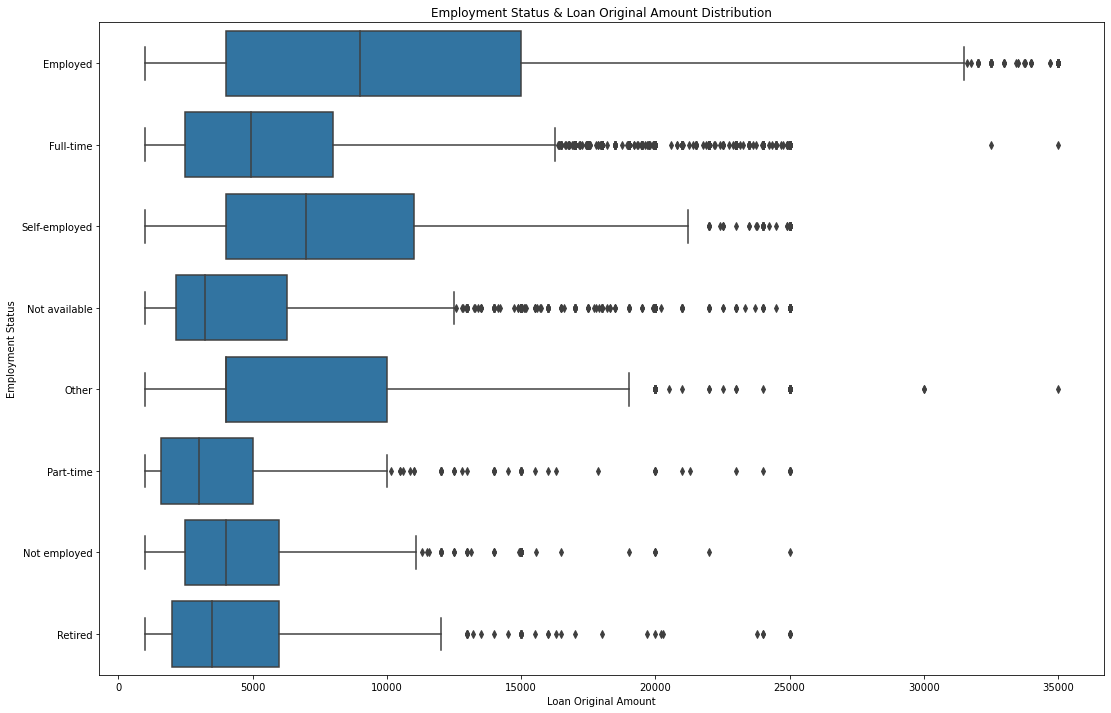

In [117]:
cate_order = df_loanscp.EmploymentStatus.value_counts().index

plt.figure(figsize = [18, 12])
bcolor = sns.color_palette()[0]

sns.boxplot(data=df_loanscp,x='LoanOriginalAmount',y='EmploymentStatus',color=bcolor, order=cate_order)
plt.title('Employment Status & Loan Original Amount Distribution')
plt.xlabel('Loan Original Amount')
plt.ylabel('Employment Status');

> **Being employed gives a borrower a chance to access more loans.**

### What is the relationship between credit grade and status loan?

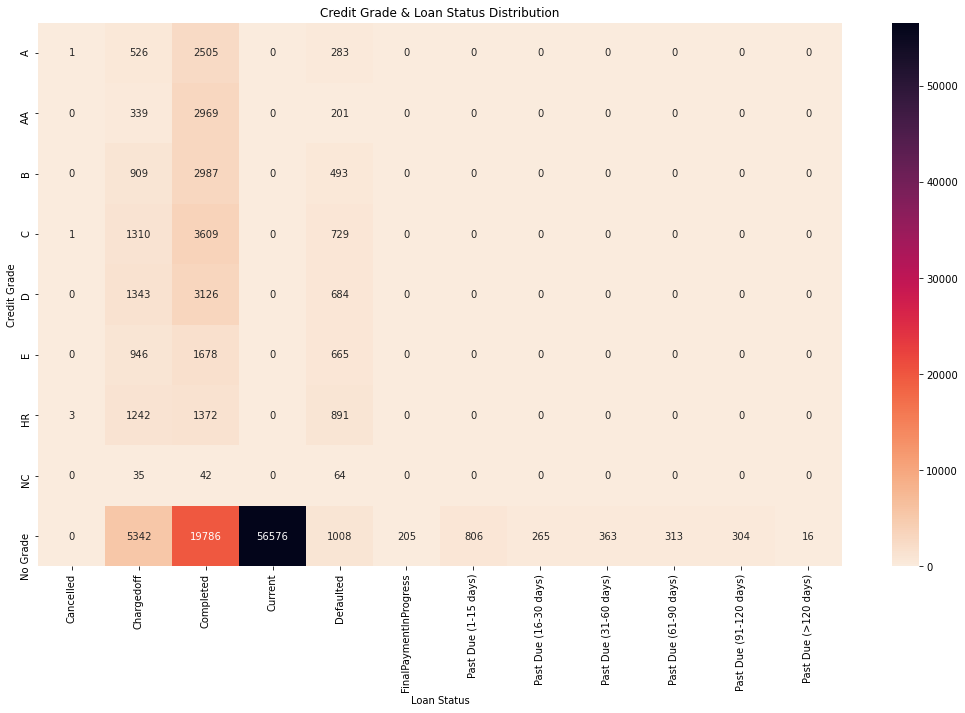

In [118]:
# Group the loans by creditgrade and loan status
loan_gradestatus = df_loanscp.groupby(['CreditGrade', 'LoanStatus']).count()['LoanOriginationDate']
loan_gradestatus = loan_gradestatus.reset_index()

# Rename the loanoriginaldate column and pivot the columns
# Fill missing values with 0
loan_gradestatus = loan_gradestatus.rename(columns={'LoanOriginationDate': 'count'}) 
loan_gradestatus = loan_gradestatus.pivot(index = 'CreditGrade', columns = 'LoanStatus', values = 'count')
loan_gradestatus.fillna(0, inplace=True)

# Plot the data using a heatmap
# A heatmap can be used to show relationships between categorical variables
# Note similar colors across the row depict there is a relationship between variables and vice versa
plt.figure(figsize = [18, 10])
sns.heatmap(loan_gradestatus, cmap = 'rocket_r', annot = True, fmt = ".0f")
plt.title('Credit Grade & Loan Status Distribution')
plt.ylabel("Credit Grade")
plt.xlabel("Loan Status");

> **Loans in Grade C had the highest completion and default rate while those in NC had the lowest respectivelly, this applies for all loans that had a Credit Grade. However looking at all loans with or without a credit grade, loans with No Grade cumulatively had the highest rate of all the loan statuses apart from cancelled**

### What is the distribution between Credit Grade and Monthly Loan Payment?

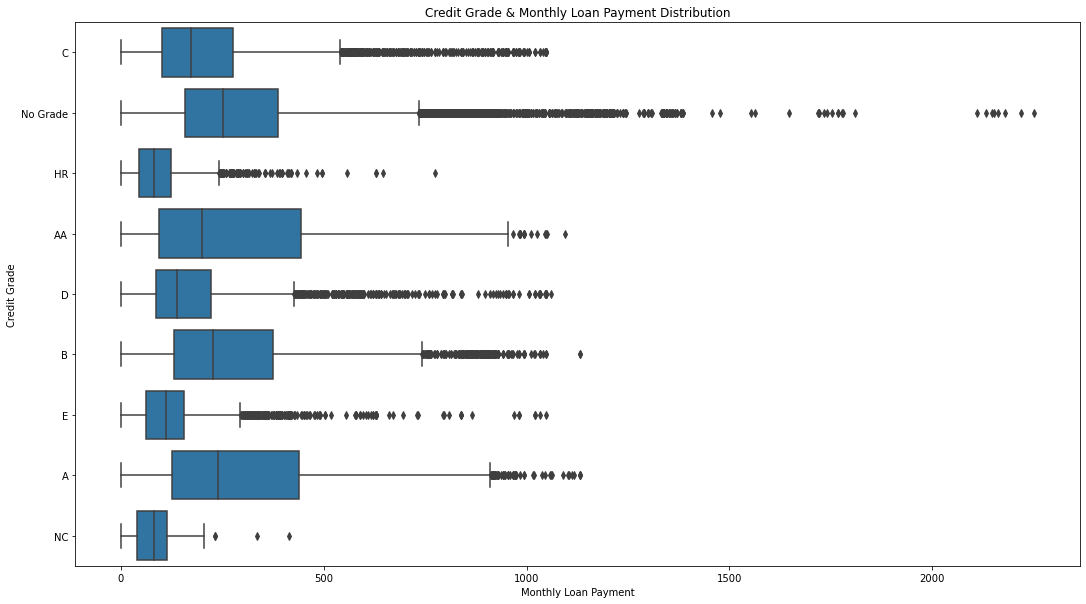

In [119]:
plt.figure(figsize = [18, 10])
sns.boxplot(data=df_loanscp,x='MonthlyLoanPayment',y='CreditGrade',color=base_color)
plt.title('Credit Grade & Monthly Loan Payment Distribution')
plt.xlabel('Monthly Loan Payment')
plt.ylabel('Credit Grade');

> **Loans that fell in the Credit-Grade groups of HR, E and NC had the lowest montly loan payments on average while those in A and AA paid more**

## My Comments

- If a potential borrower is employed then they automatically have a higher chance at getting access to larger loan amounts compared to an unemployed one. 
- Also, if one has the credit grading of HR or E or NC they will most likely pay lower monthly payments.

## Multivariate Exploration

> **Checking the relationships between mutiple variables.**

### What is the relationship between these three variables: MonthlyLoanPayment, LoanStatus and ProsperScore?

###

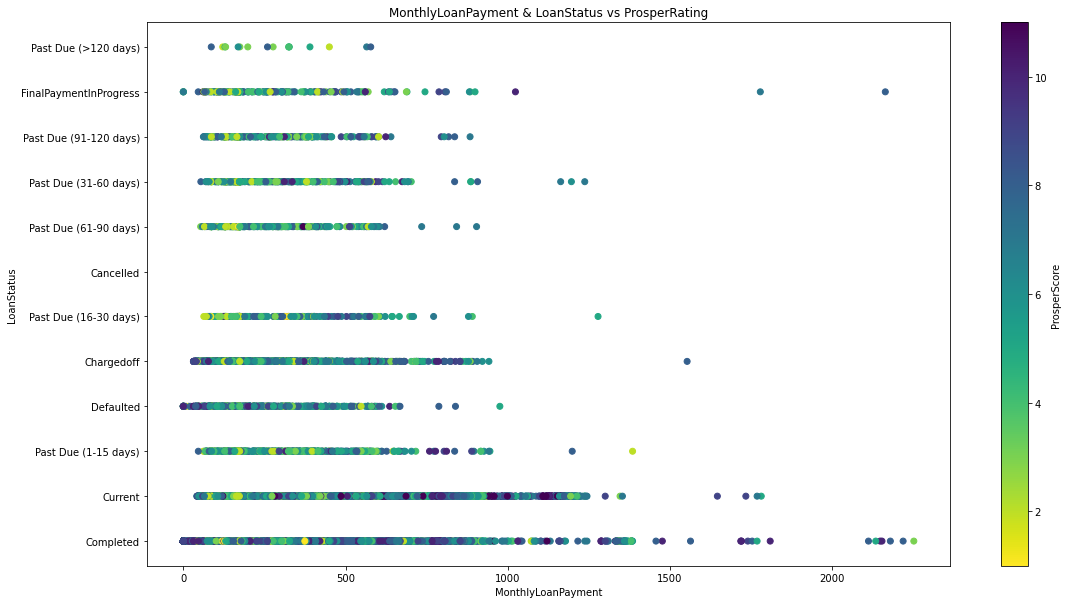

In [120]:
# MonthlyLoanPayment and LoanStatus vs ProsperRating

plt.figure(figsize = [18, 10])
plt.scatter(data=df_loanscp,x='MonthlyLoanPayment',y = 'LoanStatus',c='ProsperScore',cmap = 'viridis_r')
plt.colorbar(label = 'ProsperScore');
plt.xlabel('MonthlyLoanPayment')
plt.ylabel('LoanStatus')
plt.title('MonthlyLoanPayment & LoanStatus vs ProsperRating');

> **Completed and Current Loans seemed to have the lowest risks while the others which were mostly past due had higher risks.**

### What is the relationship between these three variables: BorrowerRate, Borrower APR and ProsperScore?

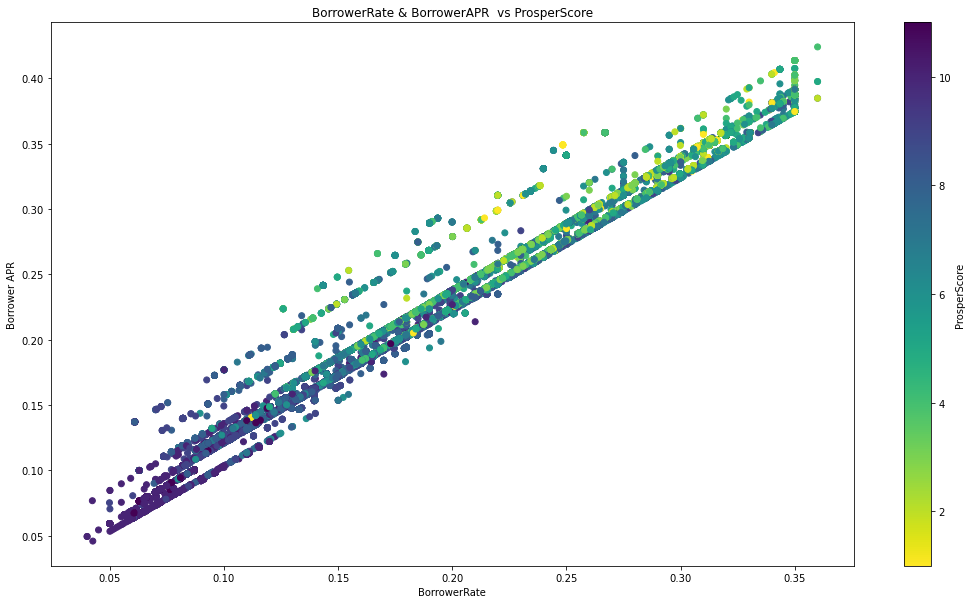

In [122]:
plt.figure(figsize = [18, 10])
plt.scatter(data=df_loanscp,x='BorrowerRate',y = 'BorrowerAPR',c='ProsperScore',cmap = 'viridis_r')
plt.colorbar(label = 'ProsperScore');
plt.xlabel('BorrowerRate')
plt.ylabel('Borrower APR')
plt.title('BorrowerRate & BorrowerAPR  vs ProsperScore');

> **BorrowerAPR and BorrowerRate have a strong positive relationship as seen above, an increase or decrease in either affects the other directly. Majority of loans with lower BorrowerAPR & BorrowerRate have higher ProsperScore(lower risks) and visa-versa**

### Interesting or surprising interactions I found

- I found it interesting that having an asset like a home did not by a big margin determine whether you could access a loan or not. Before jumping into exploring the data, I would have thought a house could be a security and a game changer into giving one a better advantage in getting a loan but that wasn't the case as seen in this dataset.

## Conclusions


- As a student, a potential borrower is most likely disadvantaged at getting a loan as they form the smallest group of loan borrowers. However, those employed as professionals, computer programmers, executives and teachers form the largest groups of borrowers.

- Even more interesting is he fact that the largest group of borrowers were categorised as others meaning there is a likely possibility their occupations were not captured in the loan documenting process either the borrowers didn't want to disclose their occupations or some other reasons.

- The biggest group of borrowers had an income range of between $25,000 to $49,999.

- Over 90% of all loans given had the income of the borrowers verfified meaning it was essential to have a verifiable income to access a loan.

- 2013 had the highest number of loans given while 2005 had the least.

- The Borrower's Annual Percentage Rate (APR) increased or decreased as the borrower's interest rate increased or decreased respectivelly. To note also, loans with the lowest interest rates had the lowest risk scores.

- Majority of loans that were past due had higher risks associated with them, looking at their prosperscore.
